Relax Challenge

In [153]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [108]:
#Read data
user_engagement = pd.read_csv("takehome_user_engagement.csv", parse_dates=True)
users = pd.read_csv("takehome_users.csv", encoding='latin-1')

In [3]:
users.head(5)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [5]:
user_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [6]:
user_engagement.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


After inspecting the data, it is clear that we will have to use the user_engagement dataframe to calculate and determine whether or not a user is considered "adopted" as defined by the problem. We will then have to add these labels to the users dataframe to perform modeling.

In order to determine whether or not they are "adopted", I will use the time_stamp as a datetime in the user_engagement dataframe, set it as the index, and write a loop that will take a users logins and calculate whether or not over any 7 day period they had logged on 3 or more times.

In [109]:
#Convert time_stamp into datetime object
user_engagement.time_stamp = pd.to_datetime(user_engagement.time_stamp)

In [110]:
#Set time_stamp as index
user_engagement.set_index("time_stamp", inplace=True)
user_engagement.head()

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1


In [111]:
#Determine "adopted" labels
labels = []
for i in range(1,12001):
    user_logins = user_engagement.loc[user_engagement.user_id == i]
    resampled = user_logins.rolling('7d').count()
    if resampled.loc[resampled.visited >= 3].shape[0] > 0:
        adopted = 1
    else:
        adopted = 0
        
    labels.append(adopted)

In [112]:
#Add labels to users dataframe
users['adopted'] = labels

Let's inspect the users dataframe:

In [7]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
adopted                       12000 non-null int64
dtypes: float64(2), int64(5), object(4)
memory usage: 1.0+ MB


Since creation_time might be a useful variable, let's convert it from a string to a numerical value that we can put in sklearn

In [113]:
#Create creation timestamp column
users["creation_timestamp"] = pd.to_datetime(users.creation_time)
users["creation_timestamp"] = pd.to_numeric(users.creation_timestamp) / 10**9

We can also see that there are only 8823 values for "last_session_creation_time". Since there are quite a lot of missing values here, and we do not want to lose all the information by dropping all of these rows, we will do some imputation. Because this column represents the time stamp of the last login, those with no values means they simply haven't logged in. Therefore I do not think imputing the mean or median would make sense here. Instead I will impute the value of the account creation time, which represents an older date, which better represents the fact that they are not heavy or recent users.

In [114]:
#Impute account creation date for null values in last_session_creation_time
users.last_session_creation_time.fillna(users.creation_timestamp, inplace=True)

Now that we've imputed values for last_session_creation_time, let's create another column that is the difference between last login time and the account creation time, as it might prove to be a useful feature.

In [115]:
#Create time difference column
users["creation_last_difference"] = users["last_session_creation_time"] - users["creation_timestamp"]

We will likely not use the invited_by_user_id feature as One-Hot-Encoding that variable would create too many variables. Therefore, we will not worry about those missing values.

In order to add more features, I considered a couple additional options, such as the the email account domain name:

In [20]:
#Try creating email domain feature
split_emails = users.email.str.split('@')
email_domain = [x[1] for x in split_emails]
users["email_domain"] = pd.Series(email_domain)

In [21]:
len(pd.Series(users.email_domain).unique())

1184

However, one can see with over 1000 unique email domains, this is not a feasible feature as I would have to one-hot-encode the column thus adding over 1000 columns. Therefore we will leave it out.

Let's now inspect the new dataframe:

In [135]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,creation_timestamp,creation_last_difference
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0,1.398139e+09,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,1.384487e+09,11750400.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0,1.363735e+09,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0,1.369124e+09,86400.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0,1.358418e+09,432000.0


In [117]:
users.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,creation_timestamp,creation_last_difference
count,12000.00000,1.200000e+04,12000.000000,12000.000000,12000.000000,6417.000000,12000.000000,1.200000e+04,1.200000e+04
mean,6000.50000,1.377743e+09,0.249500,0.149333,141.884583,5962.957145,0.133500,1.373981e+09,3.762122e+06
std,3464.24595,1.952576e+07,0.432742,0.356432,124.056723,3383.761968,0.340128,1.871814e+07,1.091685e+07
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000,0.000000,1.338425e+09,0.000000e+00
25%,3000.75000,1.361464e+09,0.000000,0.000000,29.000000,3058.000000,0.000000,1.358285e+09,0.000000e+00
50%,6000.50000,1.380630e+09,0.000000,0.000000,108.000000,5954.000000,0.000000,1.375739e+09,0.000000e+00
75%,9000.25000,1.396570e+09,0.000000,0.000000,238.250000,8817.000000,0.000000,1.390904e+09,2.592000e+05
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000,1.000000,1.401494e+09,6.298560e+07


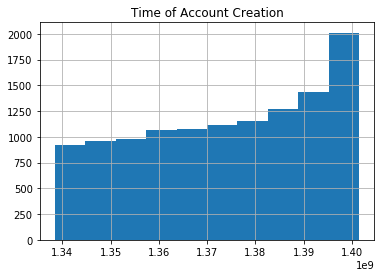

In [161]:
users.creation_timestamp.astype("int64").hist()
plt.title("Time of Account Creation")
plt.show()

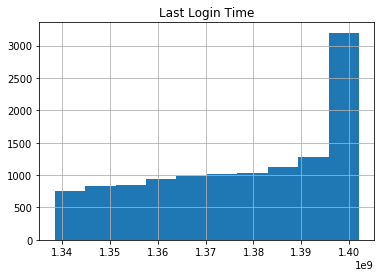

In [164]:
users.last_session_creation_time.astype("int64").hist()
plt.title("Last Login Time")
plt.show()

I will now OneHotEncode the categorical feature "creation_source" so it may be used in modeling:

In [120]:
#One hot encode categorical variables
categorical_cols = ["creation_source"]
categorical_data = users[categorical_cols]
enc = OneHotEncoder(categories='auto', sparse=False, drop="first")
enc_cat_data = pd.DataFrame(enc.fit_transform(categorical_data))
enc_cat_data.columns = enc.get_feature_names()
enc_cat_data.head()

,x0_ORG_INVITE,x0_PERSONAL_PROJECTS,x0_SIGNUP,x0_SIGNUP_GOOGLE_AUTH
0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0


I will now select all the relevant numerical features that I will merge with the OneHotEncoded categorical data for modeling:

In [121]:
#Select numerical features
numerical_data = users[["last_session_creation_time",
                        "opted_in_to_mailing_list",
                        "enabled_for_marketing_drip",
                        "adopted",
                        "creation_timestamp", 
                        "creation_last_difference"]]

In [136]:
#Merge numerical and OneHotEncoded data
model_data = pd.merge(numerical_data, enc_cat_data, how="left", left_index=True, right_index=True)

Let's inspect the modeling dataframe:

In [137]:
model_data.head()

,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted,creation_timestamp,creation_last_difference,x0_ORG_INVITE,x0_PERSONAL_PROJECTS,x0_SIGNUP,x0_SIGNUP_GOOGLE_AUTH
0,1.398139e+09,1,0,0,1.398139e+09,0.0,0.0,0.0,0.0,0.0
1,1.396238e+09,0,0,1,1.384487e+09,11750400.0,1.0,0.0,0.0,0.0
2,1.363735e+09,0,0,0,1.363735e+09,0.0,1.0,0.0,0.0,0.0
3,1.369210e+09,0,0,0,1.369124e+09,86400.0,0.0,0.0,0.0,0.0
4,1.358850e+09,0,0,0,1.358418e+09,432000.0,0.0,0.0,0.0,0.0


In [138]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
last_session_creation_time    12000 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
adopted                       12000 non-null int64
creation_timestamp            12000 non-null float64
creation_last_difference      12000 non-null float64
x0_ORG_INVITE                 12000 non-null float64
x0_PERSONAL_PROJECTS          12000 non-null float64
x0_SIGNUP                     12000 non-null float64
x0_SIGNUP_GOOGLE_AUTH         12000 non-null float64
dtypes: float64(7), int64(3)
memory usage: 937.6 KB


In [139]:
#Balance of data
model_data.adopted.mean()

0.1335

One can see the target variable (whether they are an adopted user or not), is very imbalanced with only 13.35% being adopted.

In order to answer the question, which is to identify which factors best predict user adoption, I will create some models and look at the feature importances. I will start with a simple random forest model as it can easily display feature importances:

In [140]:
#Train test split
target_column = "adopted"
X = model_data.drop(target_column, axis=1)
y = model_data[[target_column]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

I will use GridSearch to optimize hyperparameters. I will optimize for ROC AUC due to target class imbalance

In [143]:
#RF GridSearchCV
n_estimator_space = [50, 100, 200]
max_features_space = [2, 'sqrt', 5]
class_weight_space = ['balanced', 'balanced_subsample', None]
criterion_space = ['gini', 'entropy']
param_grid = {'n_estimators': n_estimator_space, 
              'max_features': max_features_space, 
              'class_weight': class_weight_space, 
              'criterion': criterion_space}
rf_tune = RandomForestClassifier(random_state=42)
rf_cv = GridSearchCV(rf_tune, param_grid, cv=3, scoring='roc_auc')
rf_cv.fit(X_train, y_train.values.ravel())
print(rf_cv.best_params_)
print(rf_cv.best_score_)

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 200}
0.9923389170333583


In [144]:
#Random forest with best parameters
rf = RandomForestClassifier(n_estimators = 200,
                           max_features = "sqrt",
                           criterion = "entropy",
                           class_weight="balanced",
                           random_state=42)
rf_model = rf.fit(X_train, y_train.values.ravel())
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)

print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

print("Classification Report")
print(metrics.classification_report(y_test, y_pred))

Confusion Matrix:
[[2055   25]
 [  43  277]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2080
           1       0.92      0.87      0.89       320

    accuracy                           0.97      2400
   macro avg       0.95      0.93      0.94      2400
weighted avg       0.97      0.97      0.97      2400



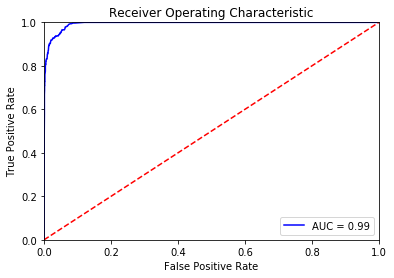

In [145]:
#RF ROC Curve
probs = y_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, probs, pos_label=1.)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

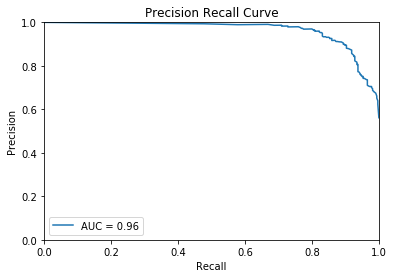

In [146]:
#RF Precision-Recall Curve
probs = y_prob[:,1]
precision, recall, thresholds = metrics.precision_recall_curve(y_test, probs, pos_label=1.)
prc_auc = metrics.auc(recall, precision)

plt.title("Precision Recall Curve")
plt.plot(recall, precision, label= 'AUC = %0.2f' % prc_auc)
plt.legend(loc = 'lower left')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [147]:
#RF Feature Importances
feature_importances = pd.DataFrame()
feature_importances["feature"] = X_train.columns
feature_importances["importance"] = rf_model.feature_importances_
feature_importances.sort_values(by='importance', ascending=False).head(10)

,feature,importance
4,creation_last_difference,0.646905
0,last_session_creation_time,0.244577
3,creation_timestamp,0.088002
6,x0_PERSONAL_PROJECTS,0.004029
1,opted_in_to_mailing_list,0.003849
5,x0_ORG_INVITE,0.003339
2,enabled_for_marketing_drip,0.003337
8,x0_SIGNUP_GOOGLE_AUTH,0.003204
7,x0_SIGNUP,0.002759


One can see how by a large margin the most important features are creation_last_difference (the difference in time between account creation and the last login), last_session_creation_time (the time of last login), and creation_timestamp (the time of account creation). 

Not that the models performance could get much better, but let's try another model. This time we will use a Gradient Boosting Classifier:

In [155]:
#GB GridSearchCV
n_estimator_space = [50, 100, 200, 500]
max_features_space = [2, 'sqrt', 5, 7]
learning_rate_space = [0.01, 0.1, 0.5,  1]
loss_space = ['deviance', 'exponential']

param_grid = {'n_estimators': n_estimator_space, 
              'max_features': max_features_space, 
              'learning_rate': learning_rate_space, 
              'loss': loss_space}
gb_tune = GradientBoostingClassifier(random_state=42)
gb_cv = GridSearchCV(gb_tune, param_grid, cv=3, scoring='roc_auc')
gb_cv.fit(X_train, y_train.values.ravel())
print(gb_cv.best_params_)
print(gb_cv.best_score_)

{'learning_rate': 0.01, 'loss': 'deviance', 'max_features': 5, 'n_estimators': 500}
0.9943056280819822


In [156]:
#Gradient Boosting with best parameters
gb = GradientBoostingClassifier(n_estimators=500, 
                                learning_rate=0.01, 
                                loss='deviance', 
                                max_features=5, 
                                random_state=42)
gb_model = gb.fit(X_train, y_train.values.ravel())
y_pred = gb_model.predict(X_test)
y_prob = gb_model.predict_proba(X_test)

print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

print("Classification Report")
print(metrics.classification_report(y_test, y_pred))

Confusion Matrix:
[[2059   21]
 [  40  280]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2080
           1       0.93      0.88      0.90       320

    accuracy                           0.97      2400
   macro avg       0.96      0.93      0.94      2400
weighted avg       0.97      0.97      0.97      2400



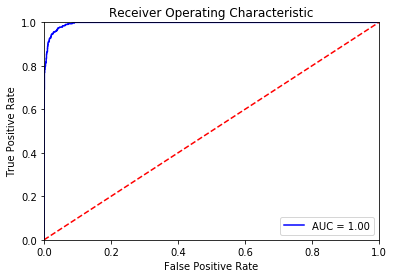

In [157]:
#GB ROC Curve
probs = y_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, probs, pos_label=1.)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

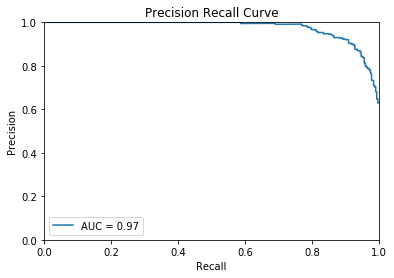

In [158]:
#GB Precision-Recall Curve
probs = y_prob[:,1]
precision, recall, thresholds = metrics.precision_recall_curve(y_test, probs, pos_label=1.)
prc_auc = metrics.auc(recall, precision)

plt.title("Precision Recall Curve")
plt.plot(recall, precision, label= 'AUC = %0.2f' % prc_auc)
plt.legend(loc = 'lower left')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [160]:
#GB Feature Importances
feature_importances = pd.DataFrame()
feature_importances["feature"] = X_train.columns
feature_importances["importance"] = gb_model.feature_importances_
feature_importances.sort_values(by='importance', ascending=False).head(10)

,feature,importance
4,creation_last_difference,0.753390
0,last_session_creation_time,0.199786
3,creation_timestamp,0.045885
6,x0_PERSONAL_PROJECTS,0.000405
8,x0_SIGNUP_GOOGLE_AUTH,0.000292
2,enabled_for_marketing_drip,0.000095
1,opted_in_to_mailing_list,0.000062
5,x0_ORG_INVITE,0.000056
7,x0_SIGNUP,0.000029


Once again the model performs very well and we same the same top 3 features. Let's explore these 3 features in more detail:

<function matplotlib.pyplot.show(*args, **kw)>

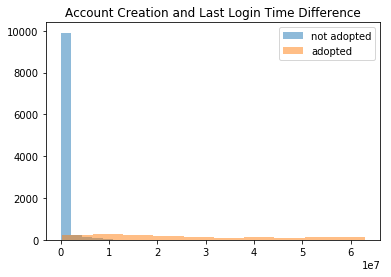

In [165]:
#Inspect creation_last_difference
adopted = model_data.loc[model_data.adopted == 1]["creation_last_difference"]
not_adopted = model_data.loc[model_data.adopted == 0]["creation_last_difference"]

plt.hist(not_adopted, bins = 10, alpha=0.5, label="not adopted")
plt.hist(adopted, bins = 10, alpha=0.5, label="adopted")
plt.legend()
plt.title("Account Creation and Last Login Time Difference")
plt.show

One can see the major difference in the distributions of those who are considered adopted and those who aren't. This makes sense as the difference between the last login and account creation time is very small in those who are not adopted. This suggests that they do not use the application over a long period of time.

<function matplotlib.pyplot.show(*args, **kw)>

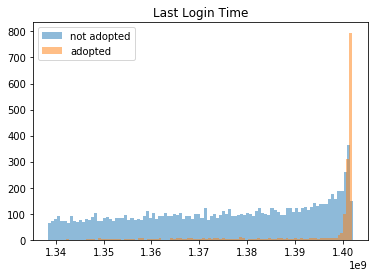

In [163]:
#Inspect last_session_creation_time
adopted = model_data.loc[model_data.adopted == 1]["last_session_creation_time"]
not_adopted = model_data.loc[model_data.adopted == 0]["last_session_creation_time"]

plt.hist(not_adopted, bins = 100, alpha=0.5, label="not adopted")
plt.hist(adopted, bins = 100, alpha=0.5, label="adopted")
plt.legend()
plt.title("Last Login Time")
plt.show

One can see how the adopted users seem to concentrate at much more recent last login times.

<function matplotlib.pyplot.show(*args, **kw)>

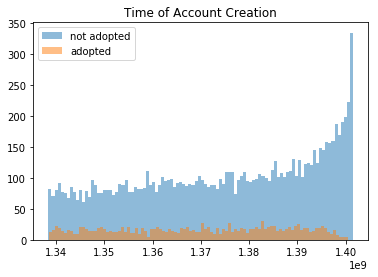

In [166]:
#Inspect creation_timestamp
adopted = model_data.loc[model_data.adopted == 1]["creation_timestamp"]
not_adopted = model_data.loc[model_data.adopted == 0]["creation_timestamp"]

plt.hist(not_adopted, bins = 100, alpha=0.5, label="not adopted")
plt.hist(adopted, bins = 100, alpha=0.5, label="adopted")
plt.legend()
plt.title("Time of Account Creation")
plt.show

Here we can some deviance at the right end of the distribution. This might be explained by the fact that recent sign ups have not had enough time to meet the criteria of "adopted" (3 logins within one week), or it could be some change in the application that caused a decrease in adoption.

All in all we can see that these models perform extremely well in predicting who will adopt. In addition, it seems clear that creation_last_difference (the difference in time between account creation and the last login), last_session_creation_time (the time of last login), and creation_timestamp (the time of account creation) are the factors which best predict user adoption.